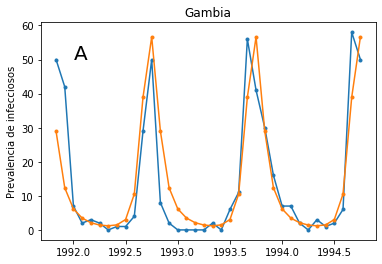

In [4]:
#Figura 2. Series de tiempo de los individuos infectados predichos por el modelo SIRS vs. casos reportados

#Classic Gambia

from numpy import hstack,linspace,cos,log,where
from numpy import pi,array,zeros,loadtxt,savetxt
from numpy import random,nonzero,copy,ones
from scipy import integrate,linalg,optimize
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
import sys

def funcionSIRSClasica(y, t, b):
    f = zeros([2])
    betaIS = b[0]*(1.0 + b[1]*cos(2.0*pi*t))*y[0]*y[1] #beta(t) = Seasonal forcing (ec. 8) * (I/N)*S creo
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS                          #(ec. 2 de SIRS) con tasa de incidencia de (ec. 8)
    return f
                               
def evaluarClasica(p, data, tdata):
    k = 4
    dt = p[2]/(12*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,data[0]/N]
    y0 = integrate.odeint(funcionSIRSClasica,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    beta_romb = p[0]*(1.0 + p[1]*cos(2.0*pi*t_romb))
    ySoln_romb = integrate.odeint(funcionSIRSClasica,y0,t_romb,args=(p,))*N
    ss = copy(ySoln_romb[0:-1,0])
    ss.shape = n,2**k
    ssn = copy(ss[:,0])
    ssn.shape = n,1
    ssn[0:-1] = ssn[1:]
    ssn[-1] = ySoln_romb[-1,0]
    ss = hstack((ss,ssn))
    ii = copy(ySoln_romb[0:-1,1])
    ii.shape = n,2**k
    iin = copy(ii[:,0])
    iin.shape = n,1
    iin[0:-1] = iin[1:]
    iin[-1] = ySoln_romb[-1,1]
    ii = hstack((ii,iin))
    beta = copy(beta_romb[0:-1])
    beta.shape = n,2**k
    betan = copy(beta[:,0])
    betan.shape = n,1
    betan[0:-1] = betan[1:]
    betan[-1] = beta_romb[-1]
    beta = hstack((beta,betan))    
    result = array(list(map(integrate.romb,beta*ii*ss/N,dt)))
    result.shape = n
    return result

def graficarGambiaSIRSClasico(q, data, tdata):        
    ySoln = evaluarClasica(q, data, tdata)
    plot(tdata+1991.75,data,'.-')
    plot(tdata+1991.75,ySoln,'.-')
    title('Gambia')
    ylabel('Prevalencia de infecciosos')
    text(1992,50,'A',fontsize=20)
    show()

N = 736.0
mu = 0.041
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
S0 = 0.85

data = loadtxt('gambia.txt')
n = len(data)
tdata = linspace(1.0/12.0,n/12.0,n)

##              b[0]              b[1]               c       
q = array([ 6.73000486e+01,  2.02069461e-01,  2.83252215e-01])
graficarGambiaSIRSClasico(q, data, tdata)



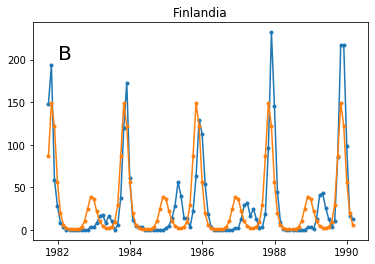

In [5]:
#Clasic Finlandia

from numpy import hstack,linspace,cos,log,where
from numpy import pi,array,zeros,loadtxt,savetxt
from numpy import random,nonzero,copy,ones
from scipy import integrate,linalg,optimize
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
import sys

def funcionSIRSClasica(y, t, b):
    f = zeros([2])
    betaIS = b[0]*(1.0 + b[1]*cos(2.0*pi*t))*y[0]*y[1] #beta(t) = Seasonal forcing (ec. 8) * (I/N)*S creo
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS                          #(ec. 2 de SIRS) con tasa de incidencia de (ec. 8)
    return f
                               
def evaluarClasica(p, data, tdata):
    k = 4
    dt = p[2]/(12*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,data[0]/N]
    y0 = integrate.odeint(funcionSIRSClasica,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    beta_romb = p[0]*(1.0 + p[1]*cos(2.0*pi*t_romb))
    ySoln_romb = integrate.odeint(funcionSIRSClasica,y0,t_romb,args=(p,))*N
    ss = copy(ySoln_romb[0:-1,0])
    ss.shape = n,2**k
    ssn = copy(ss[:,0])
    ssn.shape = n,1
    ssn[0:-1] = ssn[1:]
    ssn[-1] = ySoln_romb[-1,0]
    ss = hstack((ss,ssn))
    ii = copy(ySoln_romb[0:-1,1])
    ii.shape = n,2**k
    iin = copy(ii[:,0])
    iin.shape = n,1
    iin[0:-1] = iin[1:]
    iin[-1] = ySoln_romb[-1,1]
    ii = hstack((ii,iin))
    beta = copy(beta_romb[0:-1])
    beta.shape = n,2**k
    betan = copy(beta[:,0])
    betan.shape = n,1
    betan[0:-1] = betan[1:]
    betan[-1] = beta_romb[-1]
    beta = hstack((beta,betan))    
    result = array(list(map(integrate.romb,beta*ii*ss/N,dt)))
    result.shape = n
    return result

def graficarFinlandiaSIRSClasico(q, data, tdata):    
    ySoln = evaluarClasica(q, data, tdata)
    plot(tdata+1981.66,data,'.-')
    plot(tdata+1981.66,ySoln,'.-')
    text(1982,200,'B',fontsize=20)
    title('Finlandia')
    show()

N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
S0 = 0.85

data = loadtxt('finland.txt')[9:]
n = len(data)
tdata = linspace(1.0/12.0,n/12.0,n)

q = array([ 4.28467402e+01,  2.91359345e-01,  4.63300464e-01 ])
graficarFinlandiaSIRSClasico(q, data, tdata)

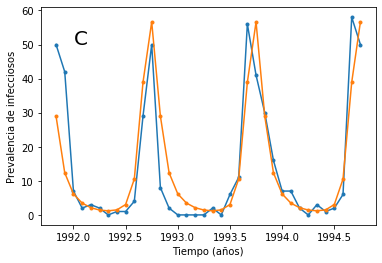

In [6]:
#LHD Gambia

from numpy import hstack,linspace,cos,log,where
from numpy import pi,array,zeros,loadtxt,savetxt
from numpy import random,nonzero,copy,ones
from scipy import integrate,linalg,optimize
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
import sys

def funcionSIRSLHD(y, t, p): 
    f = zeros([2]) 
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHD(p, data, tdata): 
    k = 4
    dt = p[3]/(12*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,data[0]/N]
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    beta_romb = p[0]*(1.0 + p[1]*cos(2.0*pi*t_romb))
    ySoln_romb = integrate.odeint(funcionSIRSLHD,y0,t_romb,args=(p,))*N
    ss = copy(ySoln_romb[0:-1,0])
    ss.shape = n,2**k
    ssn = copy(ss[:,0])
    ssn.shape = n,1
    ssn[0:-1] = ssn[1:]
    ssn[-1] = ySoln_romb[-1,0]
    ss = hstack((ss,ssn))
    ii = copy(ySoln_romb[0:-1,1])
    ii.shape = n,2**k
    iin = copy(ii[:,0])
    iin.shape = n,1
    iin[0:-1] = iin[1:]
    iin[-1] = ySoln_romb[-1,1]
    ii = hstack((ii,iin))
    beta = copy(beta_romb[0:-1])
    beta.shape = n,2**k
    betan = copy(beta[:,0])
    betan.shape = n,1
    betan[0:-1] = betan[1:]
    betan[-1] = beta_romb[-1]
    beta = hstack((beta,betan))       
    result = array(list(map(integrate.romb,beta*ii**2*ss/((ii + p[2])*N),dt)))
    result.shape = n
    return result

def graficarGambiaSIRSLHD(q, data, tdata):
    ySoln = evaluarLHD(q, data, tdata)
    plot(tdata+1991.75,data,'.-')
    plot(tdata+1991.75,ySoln,'.-')
    text(1992,50,'C',fontsize=20)
    xlabel('Tiempo (años)')
    ylabel('Prevalencia de infecciosos')        
    show()

N = 736.0
mu = 0.041
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
S0 = 0.85

data = loadtxt('gambia.txt')
n = len(data)
tdata = linspace(1.0/12.0,n/12.0,n)

q = array([ 6.73037598e+01,  2.02129920e-01,  1.00000000e-09,  2.83215496e-01 ])
graficarGambiaSIRSLHD(q, data, tdata)


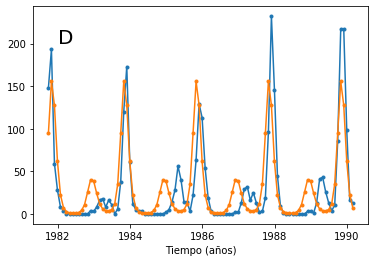

In [7]:
#LHD Finlandia

from numpy import hstack,linspace,cos,log,where
from numpy import pi,array,zeros,loadtxt,savetxt
from numpy import random,nonzero,copy,ones
from scipy import integrate,linalg,optimize
from pylab import plot,show,subplot,xlabel,ylabel,title,grid,text
import sys

def funcionSIRSLHD(y, t, p): 
    f = zeros([2]) 
    betaIS = p[0]*(1.0 + p[1]*cos(2.0*pi*t))*y[0]*y[1]**2/(y[1] + p[2])
    f[0] = xi - xi*y[0] - gamma*y[1] - betaIS
    f[1] = -eta*y[1] + betaIS
    return f

def evaluarLHD(p, data, tdata): 
    k = 4
    dt = p[3]/(12*2**k)*ones([n])
    n_romb = (2**k)*(n) + 1
    y0 =[S0,data[0]/N]
    y0 = integrate.odeint(funcionSIRSLHD,y0,linspace(0.0,200.0,2000),args=(p,))[-1,:]
    t_romb = linspace(0.0,tdata[-1],n_romb)
    beta_romb = p[0]*(1.0 + p[1]*cos(2.0*pi*t_romb))
    ySoln_romb = integrate.odeint(funcionSIRSLHD,y0,t_romb,args=(p,))*N
    ss = copy(ySoln_romb[0:-1,0])
    ss.shape = n,2**k
    ssn = copy(ss[:,0])
    ssn.shape = n,1
    ssn[0:-1] = ssn[1:]
    ssn[-1] = ySoln_romb[-1,0]
    ss = hstack((ss,ssn))
    ii = copy(ySoln_romb[0:-1,1])
    ii.shape = n,2**k
    iin = copy(ii[:,0])
    iin.shape = n,1
    iin[0:-1] = iin[1:]
    iin[-1] = ySoln_romb[-1,1]
    ii = hstack((ii,iin))
    beta = copy(beta_romb[0:-1])
    beta.shape = n,2**k
    betan = copy(beta[:,0])
    betan.shape = n,1
    betan[0:-1] = betan[1:]
    betan[-1] = beta_romb[-1]
    beta = hstack((beta,betan))       
    result = array(list(map(integrate.romb,beta*ii**2*ss/((ii + p[2])*N),dt)))
    result.shape = n
    return result

def graficarFinlandiaSIRSLHD(q, data, tdata):
    ySoln = evaluarLHD(q, data, tdata)
    plot(tdata+1981.66,data,'.-')
    plot(tdata+1981.66,ySoln,'.-')
    text(1982,200,'D',fontsize=20)
    xlabel('Tiempo (años)')
    show()
                                                                 
N = 2420.0
mu = 0.013
nu = 36.0
gamma = 1.8
xi = gamma + mu
eta = nu + mu
S0 = 0.85

data = loadtxt('finland.txt')[9:]
n = len(data)
tdata = linspace(1.0/12.0,n/12.0,n)
        
q = array([ 4.28779903e+01,  2.70760668e-01,  2.43100720e-06,  5.07831815e-01 ])
graficarFinlandiaSIRSLHD(q, data, tdata)
